<a href="https://colab.research.google.com/github/quantority/master-s-degree-projects/blob/main/TS_forecasting/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAS & HSE, Applied Time Series Forecasitng , Winter 2024-25

<font color="green"> HW #2 </font>

You can find hw2 bonus part <a href= "https://github.com/aromanenko/ATSF/blob/main/HW2_bonus_part.ipynb">here</a>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**:
- Присылайте выполненное задание в anytask (пароли и доступы см в сообщении https://t.me/c/2281312310/5/428)
- Выполненное дз сохраните в файл Surname_w2024_25_hw2.ipynb, например, ivanov_w2024_25_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в телеграмм [группу](https://t.me/+dcFuIel7VaE0YjIy) в соответствующий канал

**Deadline**: <font color="red"> 08-Jan-2025 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле (-1 балл за просрочку дедлайна в одну неделю):

$$МаксимальныйБалл=max\bigl(6,(10-ДнейПослеДедлайна/7) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

In [422]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error
import itertools
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
pd.options.plotting.backend = "plotly"
deadline_dttm = pd.to_datetime('2025-01-08 00:00:00')

pd.DataFrame(data = [[deadline_dttm+datetime.timedelta(days=x)
                          , min(10, max(6, (10-x/7)))] for x in np.linspace(-4,30,35000)],
                          columns = ['Время сдачи ДЗ', 'Максимальный балл']).set_index('Время сдачи ДЗ').\
  plot().update_layout(height=350, width=1350).show()

<h1 align="center">Check Questions (10%)</h1>


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=n)$,
    - <Answer>
    <br></br>
 - 2) ARIMA $(p=1,d=k+1,q=0)(P=1, D=1, Q=0)_s$,   
  - <Answer>
    <br></br>


**Questions 2:** Prove that ARIMA(1,1,2) model is equivalent toDamped-trend linear exponential smoothing
$${\bf(1-\phi B)(1-B)}y_t = {\bf(1-\theta_1 B-\theta_2 B^2)}\varepsilon_t$$
$$\theta_1 = 1+\phi-\alpha-\alpha\beta\phi, \text{ } \theta_2 = (\alpha-1)\phi$$
$\phi$ - coefficient of damped trend;
<Answer>
<br></br>


<h1 align="center"> Practice</h1>

In [3]:
# put you name and surname here
name_surname = "ivan_kruglov" # example 'ivan_ivanov'

ts_number = sum([ord(l) for l in name_surname])//71
print('Your ts number for HW2 is', ts_number)

Your ts number for HW2 is 18


<h2 align="center">  1. Download data for following data sets (10%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">
  
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> Find your ts <a href = 'https://docs.google.com/spreadsheets/d/1vQrQ5Ea9Mtouxff87ZcMK2CkoDXbXHKqOkAOTgdU454/edit?gid=0#gid=0'>here</a> in sheet "HW2" and download time series data


* 1) plot target ts
* 2) plot cros-series plot: independent variables and target variable on the same subplot
* 3) answer the questions:
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion?
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed).

In [4]:
# Put your code here

df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 11].drop(columns='id').set_index('Date')['2010-01-01':'2013-01-01']
ts.dropna(inplace=True, axis=1)

In [5]:
# 1
ts['EnergyConsumption'].plot()

In [6]:
# 2

fig = go.Figure()
fig.add_trace(go.Scatter(x=ts['EnergyConsumption'].index,
                        y=ts['EnergyConsumption']
                        , name="EnergyConsumption"))

fig.add_trace(go.Scatter(x=ts['EnergyConsumption'].index,
                        y=ts[['Sunday', 'Saturday']].max(axis=1).replace(0, np.NaN)
                        , name="Saturday and Sunday", yaxis="y2"))
fig.add_trace(
    go.Scatter(x=ts['EnergyConsumption'].index,
                        y=ts['Temp1']
                        , name="Temp", yaxis="y3"))


fig.update_layout(
    xaxis=dict(domain=[0.1, 0.95]),
    yaxis=dict(
        title="EnergyConsump",
    ),
    yaxis2=dict(
        title="Holidays",
        overlaying="y",
        side="right",
    ),
    yaxis3=dict(title="Temp", anchor="free", overlaying="y", autoshift=True),
)

fig.show()


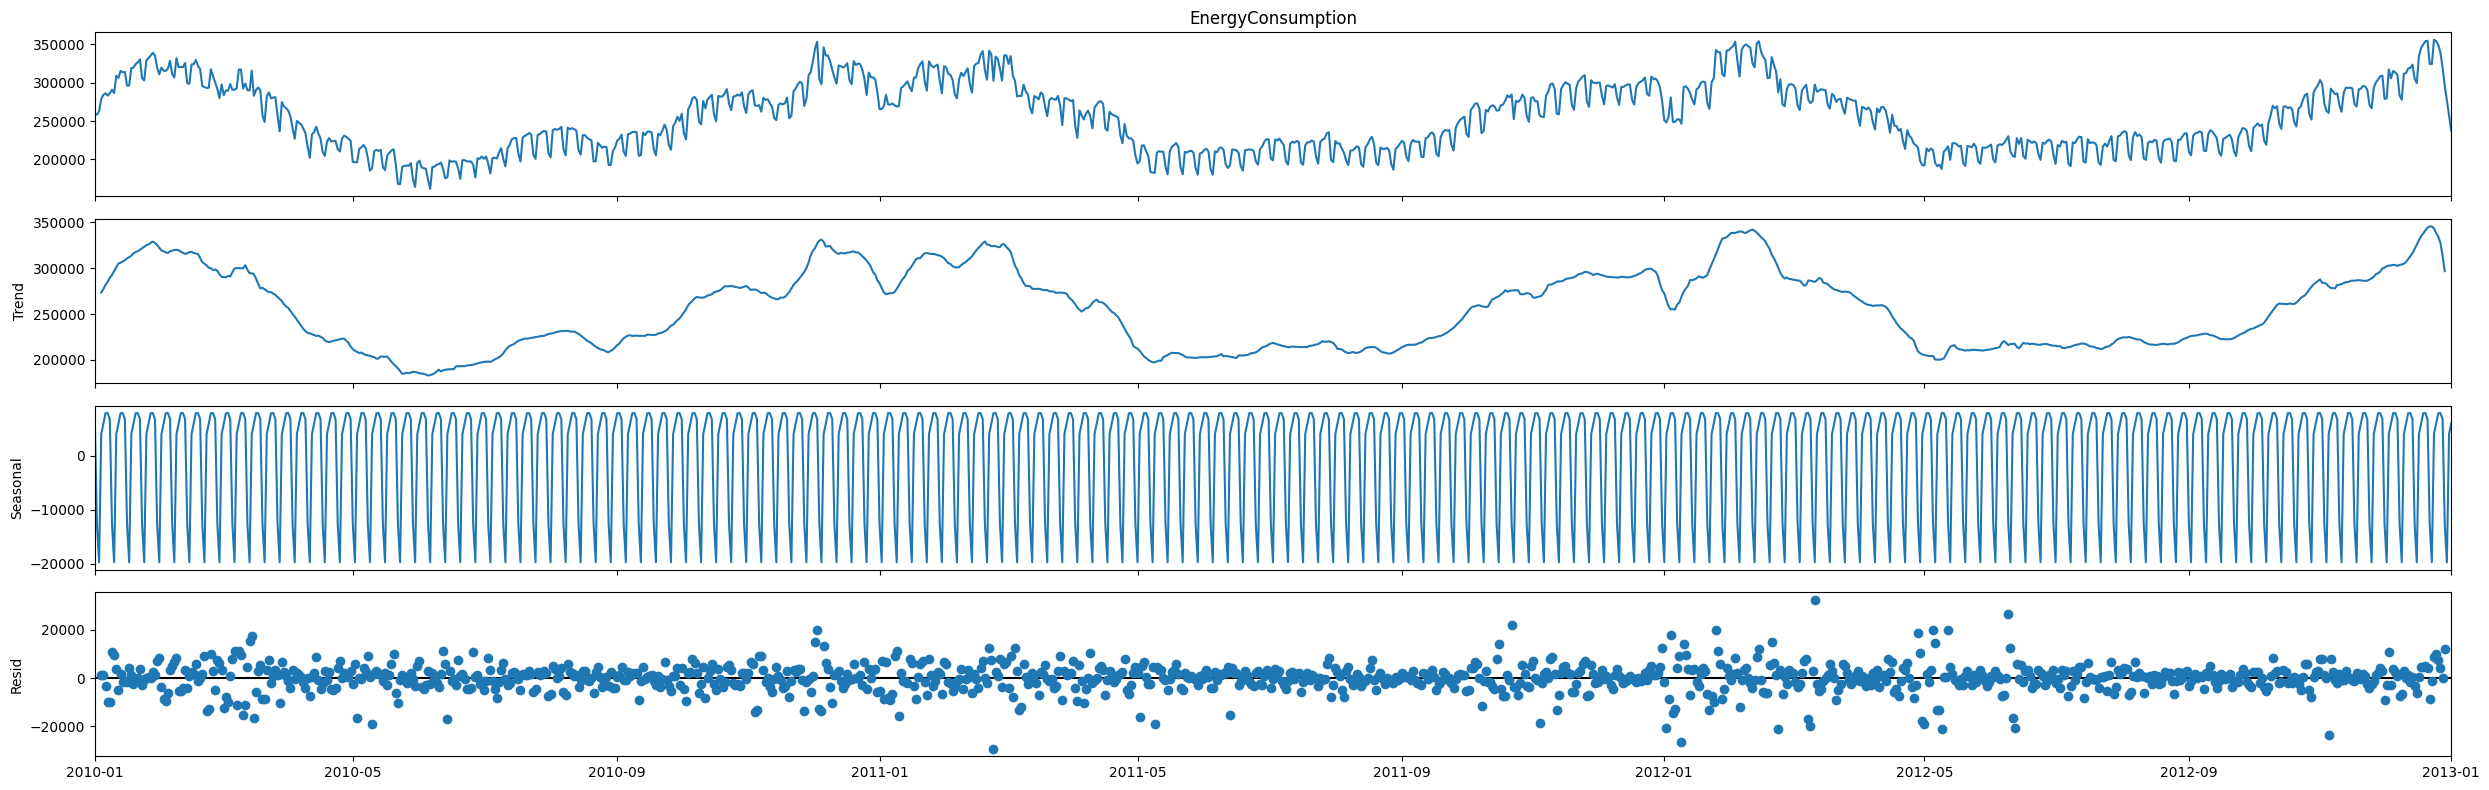

In [7]:
res = sm.tsa.seasonal_decompose(ts['EnergyConsumption'], period=7)

plt.rc('figure', figsize=(25,8))
resplot = res.plot()

- Похоже, что во временном ряде сущесвтует две сезонности, одна периодом 7 дней, вторая периодом 365 дней

- Во временном ряде есть локальные тренды
- Во временном ряде есть непостоянная дисперсия

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually **

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively:
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q)
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for
    - unbiasedness,
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [8]:
# Put your code here
split_idx = int(len(ts) * 0.8)

ts1 = ts.iloc[:split_idx]

ts2 = ts.iloc[split_idx:]

In [337]:
s = 365

ts_diff1 = (ts - ts.shift(s)).dropna()

In [338]:
s = 7

ts_diff2 = (ts_diff1 - ts_diff1.shift(s)).dropna()

In [339]:
ts_diff3 = (ts_diff2 - ts_diff2.shift(1)).dropna()

In [340]:
df_stat = stattools.adfuller(ts_diff3['EnergyConsumption'])

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

if df_stat[1] < 0.05:
  print('Ряд - стационарен')
else:
  print('Ряд - нестационарен')

The Augmented Dickey-Fuller test statistic -8.405007, 
pvalue: 0.00 
maximal Lag: 20 
critical values: {'1%': -3.4396861854831964, '5%': -2.865660062273053, '10%': -2.5689640195342456}
Ряд - стационарен


In [341]:
kpss_stat= stattools.kpss(ts_diff3['EnergyConsumption'])
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

if kpss_stat[1] > 0.05:
  print('Ряд - стационарен')
else:
  print('Ряд - нестационарен')

The KPSS test statistic 0.032143, 
pvalue: 0.10 
maximal Lag: 5 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Ряд - стационарен


<ipython-input-341-4f099c7de542>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [342]:
ts_train_dif = ts_diff3[:-len(ts2)]

endog = ts_train_dif['EnergyConsumption']

exog = ts_train_dif.drop('EnergyConsumption', axis=1)

arima_order_000 = sm.tsa.ARIMA(endog=endog, exog=exog, order=[0,0,0]).fit()

print(arima_order_000.summary())

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  504
Model:                          ARIMA   Log Likelihood               -6715.696
Date:                Sat, 01 Mar 2025   AIC                          13441.392
Time:                        16:16:42   BIC                          13462.505
Sample:                    01-09-2011   HQIC                         13449.674
                         - 05-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3467   2.44e+05      0.000      1.000   -4.79e+05    4.79e+05
Temp1       -380.8447   4.06e+04     -0.009      0.993   -7.99e+04    7.91e+04
Saturday   -9189.7714   1.56e+06     -0.006      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [343]:
def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,7])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

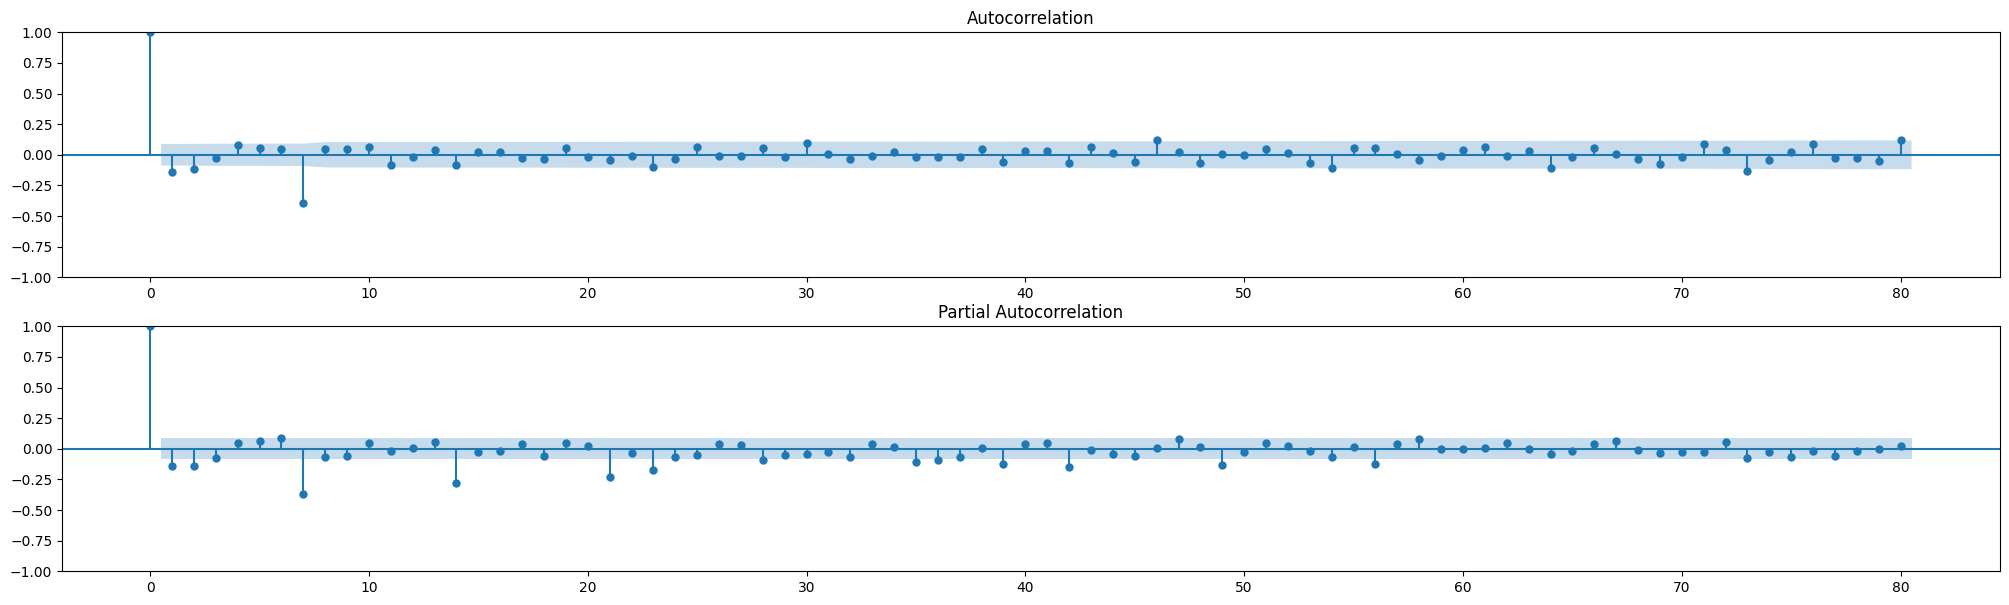

In [344]:
plot_acf_pacf(arima_order_000, lags=80)

- p = {0, 1, 2, 6}
- P = {0, 1, 2, 3, 4, 5. 6. 7}
- q = {0, 1, 2}
- Q = {0, 1, 2}

In [346]:
arima_order_000_001 = sm.tsa.SARIMAX(endog=endog, exog=exog, order=[0,0,0], seasonal_order = [0,0,1,7]).fit()

print(arima_order_000_001.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -5283.794
Date:                   Sat, 01 Mar 2025   AIC                          10577.589
Time:                           16:17:03   BIC                          10598.701
Sample:                       01-09-2011   HQIC                         10585.870
                            - 05-26-2012                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -292.2653     97.641     -2.993      0.003    -483.638    -100.893
Saturday   -9216.4286   2910.168     -3.167      0.002   -1.49e+04   -3512.605
Sunday     -2.291e+04    972

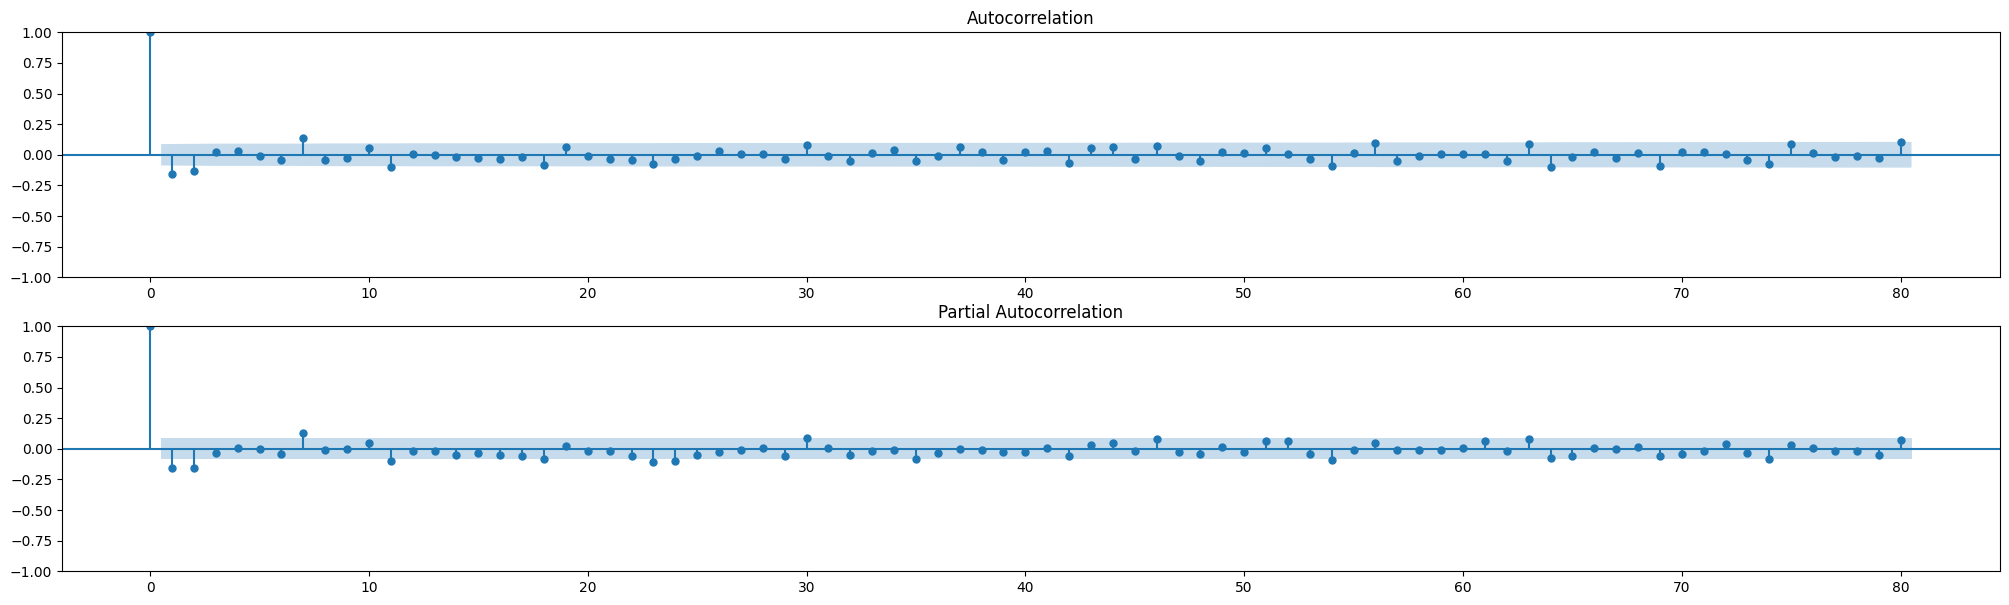

In [347]:
plot_acf_pacf(arima_order_000_001, lags=80)

In [388]:
arima_order_200_002 = sm.tsa.SARIMAX(endog=endog, exog=exog, order=[1,0,2], seasonal_order = [0,0,1,7]).fit()

print(arima_order_200_002.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                      
Dep. Variable:                   EnergyConsumption   No. Observations:                  512
Model:             SARIMAX(1, 0, 2)x(0, 0, [1], 7)   Log Likelihood               -5330.461
Date:                             Sat, 01 Mar 2025   AIC                          10676.922
Time:                                     16:30:50   BIC                          10710.829
Sample:                                 01-01-2011   HQIC                         10690.213
                                      - 05-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -418.2422    109.193     -3.830      0.000    -632.257    -204.227
Saturday   -1.911e+04    70

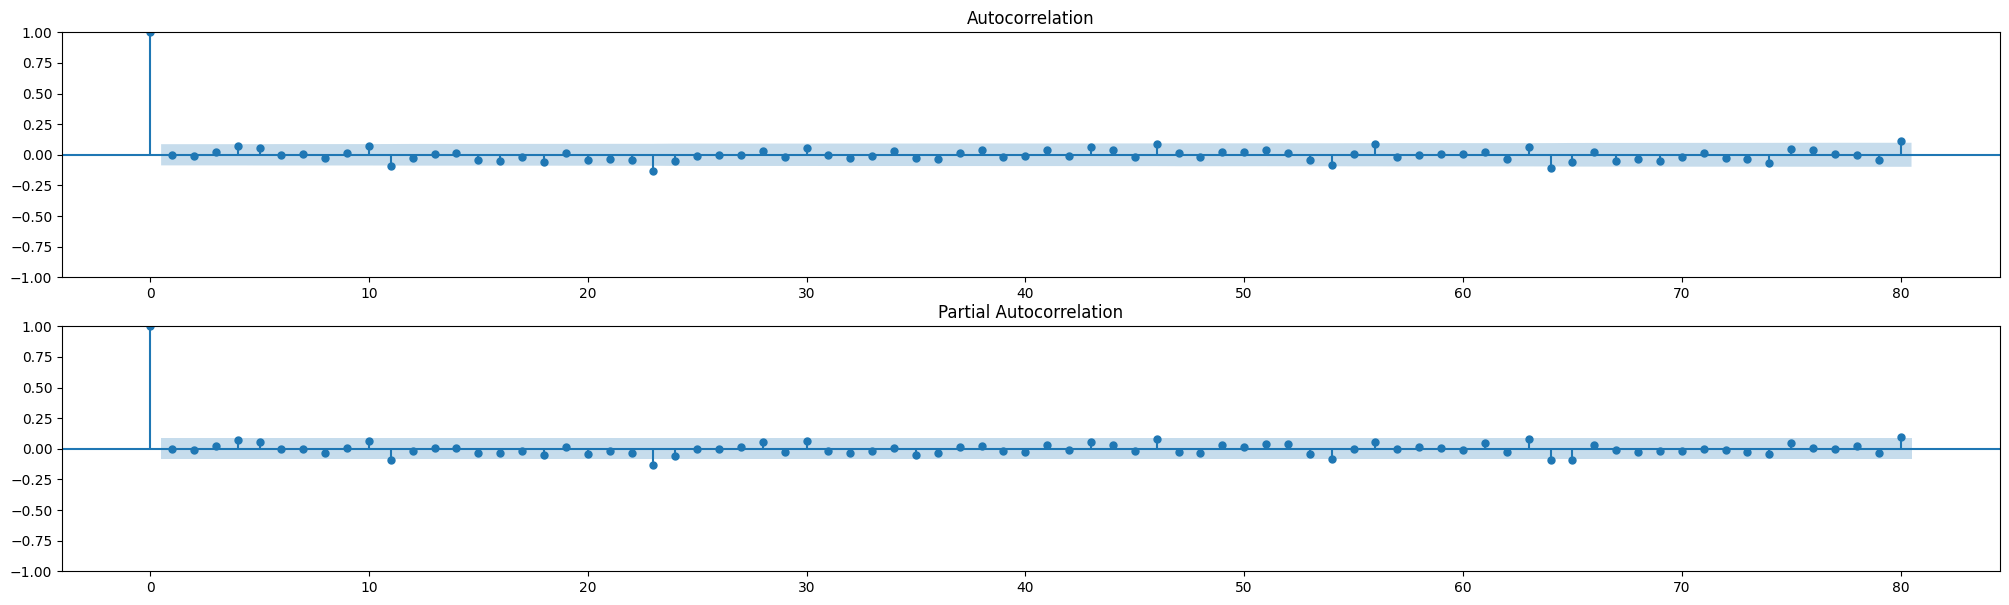

In [389]:
plot_acf_pacf(arima_order_200_002, lags=80)

In [390]:
ts_train_dif = ts_diff1[:-len(ts2)]

endog = ts_train_dif['EnergyConsumption']

exog = ts_train_dif.drop('EnergyConsumption', axis=1)

arima_order_210_011 = sm.tsa.SARIMAX(endog=endog, exog=exog, order=[0,1,2], seasonal_order=[0,0,1,7]).fit()

print(arima_order_210_011.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                      SARIMAX Results                                      
Dep. Variable:                   EnergyConsumption   No. Observations:                  512
Model:             SARIMAX(0, 1, 2)x(0, 0, [1], 7)   Log Likelihood               -5328.823
Date:                             Sat, 01 Mar 2025   AIC                          10671.646
Time:                                     16:30:56   BIC                          10701.301
Sample:                                 01-01-2011   HQIC                         10683.272
                                      - 05-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -314.4262     96.154     -3.270      0.001    -502.885    -125.968
Saturday   -1.913e+04    60

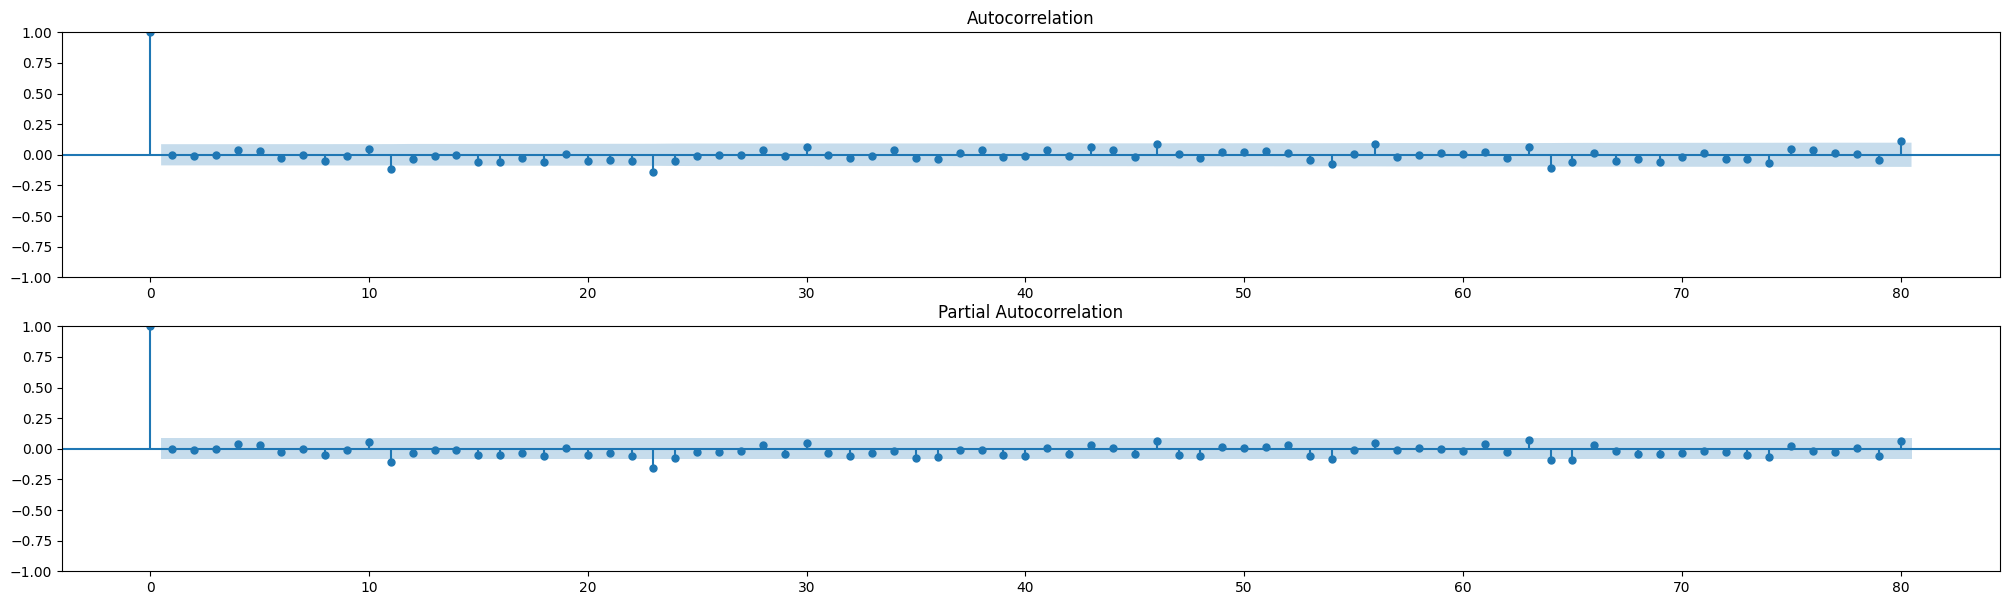

In [391]:
plot_acf_pacf(arima_order_210_011, lags=80)

In [ ]:
#arima_order_200_101 = sm.tsa.SARIMAX(endog=endog, exog=exog, order=[2,0,0], seasonal_order = [1,0,1,7]).fit()

#print(arima_order_200_101.summary())

In [ ]:
#plot_acf_pacf(arima_order_200_101, lags=80)

In [392]:
sm.stats.durbin_watson(arima_order_210_011.resid.values)

2.0031071502422577

In [393]:
stat, p = stats.wilcoxon(arima_order_210_011.resid.values)

print('Statistic: %f\npvalue: %.2f' %(stat, p))

Statistic: 65176.000000
pvalue: 0.88


In [394]:
df_stat = stattools.adfuller(arima_order_210_011.resid.values)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

if df_stat[1] < 0.05:
  print('Ряд - стационарен')
else:
  print('Ряд - нестационарен')

The Augmented Dickey-Fuller test statistic -22.596423, 
pvalue: 0.00 
maximal Lag: 0 
critical values: {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}
Ряд - стационарен


In [395]:
kpss_stat= stattools.kpss(arima_order_210_011.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

if kpss_stat[1] > 0.05:
  print('Ряд - стационарен')
else:
  print('Ряд - нестационарен')

The KPSS test statistic 0.015642, 
pvalue: 0.10 
maximal Lag: 0 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Ряд - стационарен


<ipython-input-395-e67f12d9318f>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [396]:
nlags = 100
pd.DataFrame({
    'lags': range(nlags),
    'pvalue': sm.stats.diagnostic.acorr_ljungbox(arima_order_210_011.resid.values, lags=nlags)['lb_pvalue'],
    'critial': np.array([0.05]*nlags)
}).set_index('lags').plot().update_layout(height=350, width=1300).show()

In [397]:
def draw_arima_forecast(ts, arima_model, start_dt=0, end_dt=-1):
  predict = arima_model.get_prediction()
  forecast = pd.DataFrame(predict.predicted_mean).rename(columns = {'predicted_mean':'static_forecast'})
  forecast_ci = predict.conf_int().rename(columns = {'lower wage_boxcox':'l_ci_st',	'upper wage_boxcox':'u_ci_st'}) # confidence interval

  #  Dynamic predictions
  predict_dy = arima_model.get_prediction(dynamic=start_dt)
  forecast_dy = pd.DataFrame(predict_dy.predicted_mean).rename(columns = {'predicted_mean':'dynamic_forecast'})
  forecast_dy_ci = predict_dy.conf_int().rename(columns = {'lower wage_boxcox':'l_ci_dy',	'upper wage_boxcox':'u_ci_dy'}) # confidence interval

  if start_dt ==0:
    start_dt= ts.index.min()

  if end_dt == -1:
    end_dt = ts_wage_boxcox.index.max()

  # Plot data points and predictions
  fig = ts.loc[start_dt:].merge(
      forecast[start_dt:end_dt],
        how = 'left', left_index = True, right_index = True
        ).merge(
            forecast_dy[start_dt:],
            how = 'left', left_index = True, right_index = True
        ).merge(
          forecast_ci,
          how = 'left', left_index = True, right_index = True
        ).merge(
          forecast_dy_ci,
          how = 'left', left_index = True, right_index = True
        ).plot().update_layout(height=350, width=1300).show()

  return fig

In [399]:
start = '2012-01-01'
end = '2015-04-01'
draw_arima_forecast(ts_train_dif[['EnergyConsumption']], arima_order_210_011, start_dt=start, end_dt=end)

In [221]:
ts_diff3

,EnergyConsumption,Temp1,Saturday,Sunday
Date,,,,
2011-01-09,-7537.361,2.5,0.0,0.0
2011-01-10,5648.653,7.0,0.0,0.0
2011-01-11,1945.469,2.0,0.0,0.0
2011-01-12,22980.238,0.0,0.0,0.0
2011-01-13,-3761.131,-5.5,0.0,0.0
...,...,...,...,...
2012-12-28,-14382.331,4.0,0.0,0.0
2012-12-29,17564.216,-11.5,-1.0,0.0
2012-12-30,-21787.412,1.0,1.0,0.0


In [400]:
# Build forecast
exog_columns = ['Temp1', 'Saturday', 'Sunday']
ts_sdiff_2 = ts_diff1[-len(ts2):] # prepare
exogs = ts_sdiff_2[exog_columns] # exogeneous variables future variables
ts_frc = arima_order_210_011.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):] # integration with 365

In [401]:
# Plot the TS together with independent variables
ts_to_plot = ts.iloc[-len(ts2):]

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
fig = go.Figure()
fig.add_trace(go.Scatter(x=ts_to_plot['EnergyConsumption'].index,
                        y=ts_to_plot['EnergyConsumption']
                        , name="EnergyConsumption"))

fig.add_trace(go.Scatter(x=ts_to_plot['EnergyConsumption'].index,
                        y=ts_frc_int
                        , name="arima best forecast"))

fig.add_trace(go.Scatter(x=ts_to_plot['EnergyConsumption'].index,
                        y=ts_to_plot[['Saturday']].max(axis=1).replace(0, np.NaN)
                        , name="Saturday and Sunday", yaxis="y2"))
fig.add_trace(
    go.Scatter(x=ts_to_plot['EnergyConsumption'].index,
                        y=ts_to_plot[['Sunday']].max(axis=1).replace(0, np.NaN)
                        , name="Temp", yaxis="y3"))
fig.add_trace(
    go.Scatter(x=ts_to_plot['EnergyConsumption'].index,
                        y=ts_to_plot['Temp1']
                        , name="Temp", yaxis="y3"))

fig.update_layout(
    xaxis=dict(domain=[0.1, 0.95]),
    yaxis=dict(
        title="EnergyConsump",
    ),
    yaxis2=dict(
        title="Holidays",
        overlaying="y",
        side="right",
    ),
    yaxis3=dict(title="Temp", anchor="free", overlaying="y", autoshift=True),
)

fig.update_layout(height=500, width=1300).show()

In [402]:
mean_absolute_percentage_error(ts2['EnergyConsumption'], ts_frc_int)

0.04267976022035736

Супер классный прогноз

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [403]:
s = 365

ts_diff1 = (ts1 - ts1.shift(s)).dropna()

In [404]:
s = 7

ts_diff2 = (ts_diff1 - ts_diff1.shift(s)).dropna()

In [405]:
ts_diff3 = (ts_diff2 - ts_diff2.shift(1)).dropna()

In [409]:
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -22.596423, 
pvalue: 0.00 
maximal Lag: 0 
critical values: {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}


In [ ]:
for p, q, P, Q in itertools.product(p, q, P, Q):
  model = sm.tsa.SARIMAX(endog=endog, exog=exog, order=(p,0,q), seasonal_order=(P,0,Q,7)).fit()
  print(f"p={p}, q={q}, P={P}, Q={Q}")
  print(f'AIC %.2f, \nBIC: %.2f \nHQIC %i' %
      (model.aic, model.bic, model.hqic))
  print()

In [440]:
# Put your code here
endog = ts_diff3['EnergyConsumption']

exog = ts_diff3.drop('EnergyConsumption', axis=1)

p = [0, 1, 2, 6]
q = [0, 1, 2]
P = [0, 1, 2]
Q = [0, 1, 2]

collections = []

start_time = time.time()

for p, q, P, Q in itertools.product(p, q, P, Q):
  model = sm.tsa.SARIMAX(endog=endog, exog=exog, order=(p,0,q), seasonal_order=(P,0,Q,7)).fit()
  collections.append({ 'p q P Q':', '.join(map(str,[p,q,P,Q])),
                 'AIC': round(model.aic, 2), 'BIC': round(model.bic, 2), 'HQIC': round(model.hqic, 2) })

finish_time = (time.time() - start_time)/60

params_frame = pd.DataFrame(collections)

print('Время обучение всех моделей:', finish_time)

Время обучение всех моделей: 3.7684291283289593


In [442]:
params_frame.sort_values(ascending=True, by = ['AIC', 'BIC', 'HQIC'])

,p q P Q,AIC,BIC,HQIC
20,"0, 2, 0, 2",10545.96,10579.74,10559.21
38,"1, 1, 0, 2",10548.30,10582.08,10561.55
41,"1, 1, 1, 2",10550.39,10588.39,10565.30
11,"0, 1, 0, 2",10556.26,10585.82,10567.86
73,"2, 2, 0, 1",10556.42,10594.43,10571.33
...,...,...,...,...
63,"2, 1, 0, 0",10790.52,10820.08,10802.12
45,"1, 2, 0, 0",10791.34,10820.90,10802.93
9,"0, 1, 0, 0",10794.06,10815.17,10802.34
27,"1, 0, 0, 0",10797.88,10818.99,10806.16
